In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Rosenbrock's Function (Banana Function)

In [12]:
def gd_rosenbrock(x, step, tolerance, N):
    
    #Defining the initial values
    k=1
    error = 100
    
    #Data frame to store each iteration data
    log = pd.DataFrame(columns = ['Iteration', 'Xk', 'Xk+1', 'Pk', 'Step Size', 'Error'])
    
    while (error > tolerance) & (k <= N):
        x_init = x
        gradient = np.array([2*((200*x[0]**3) - (200*x[0]*x[1]) + x[0] - 1), 200*(x[1]-x[0]**2)])
        step = step
        x = x - step*gradient
        error = np.linalg.norm(gradient)
        
        log_info = {
            'Iteration': k,
            'Xk': x_init,
            'Xk+1': x,
            'Pk': gradient,
            'Step Size': step,
            'Error': error
        }
        log = log.append(log_info, ignore_index=True)
        solution = [k, x, gradient, step, error]
        
        k += 1
    return(log, solution)

In [45]:
log, sol = gd_rosenbrock([0, 0], 0.05, 1e-8, 1000)

/Users/jjosue/anaconda3/envs/galileo_python/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/Users/jjosue/anaconda3/envs/galileo_python/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [46]:
log

,Iteration,Xk,Xk+1,Pk,Step Size,Error
0,1,"[0, 0]","[0.1, 0.0]","[-2, 0]",0.05,2.000000e+00
1,2,"[0.1, 0.0]","[0.16999999999999998, 0.10000000000000003]","[-1.4, -2.0000000000000004]",0.05,2.441311e+00
2,3,"[0.16999999999999998, 0.10000000000000003]","[0.4947400000000002, -0.6110000000000004]","[-6.494800000000003, 14.220000000000008]",0.05,1.563300e+01
3,4,"[0.4947400000000002, -0.6110000000000004]","[-7.922383917368489, 7.9466766760000045]","[168.34247834736976, -171.1535335200001]",0.05,2.400682e+02
4,5,"[-7.922383917368489, 7.9466766760000045]","[8678.67391871237, 556.1215792577889]","[-173731.92605259476, -10963.498051635775]",0.05,1.740775e+05
5,6,"[8678.67391871237, 556.1215792577889]","[-13073350411199.648, 753188804.7791699]","[261467008397566.44, -15063764973.151812]",0.05,2.614670e+14
6,7,"[-13073350411199.648, 753188804.7791699]","[4.468797768308565e+40, 1.7091249097401403e+27]","[-8.93759553661713e+41, -3.41824981948028e+28]",0.05,8.937596e+41
7,8,"[4.468797768308565e+40, 1.7091249097401403e+27]","[-1.7848515473388738e+123, 1.9970153494039608e...","[3.5697030946777474e+124, -3.9940306988079214e...",0.05,3.569703e+124
8,9,"[-1.7848515473388738e+123, 1.9970153494039608e...","[inf, 3.1856950460379716e+247]","[-inf, -6.371390092075944e+248]",0.05,inf
9,10,"[inf, 3.1856950460379716e+247]","[nan, inf]","[nan, -inf]",0.05,NaN


/Users/jjosue/anaconda3/envs/galileo_python/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/Users/jjosue/anaconda3/envs/galileo_python/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


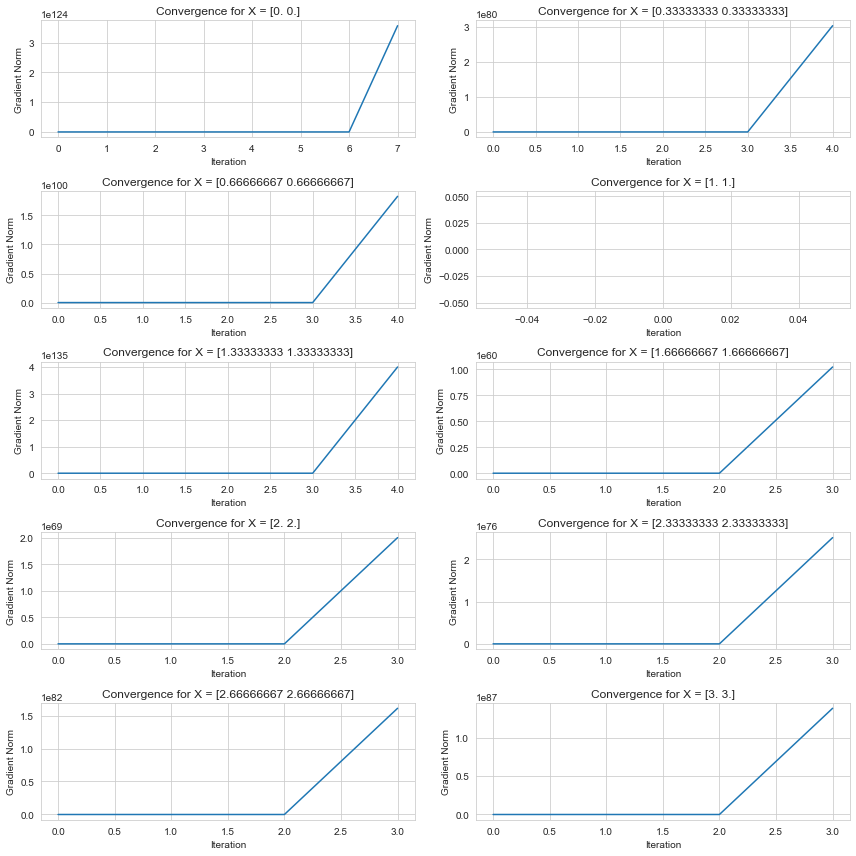

In [44]:
#Parameters
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")

#Values for step size
x_values = np.linspace((0,0), (3,3), num=10)

i=1
for x in x_values:
    log, sol = gd_rosenbrock(x, 0.05, 1e-8, 1000)
    plt.subplot(5,2,i)
    plt.plot(log['Error'])
    plt.title('Convergence for X = ' + str(x))
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Norm')
    plt.tight_layout()
    i+=1

In [43]:
str(x_values[0])

'[0. 0.]'